# Gráficos

Python proporciona diverso métodos para la visualización de datos. 

[Pandas](https://pandas.pydata.org) es una biblioteca de Python con características de marco de datos que proporciona opciones integradas para trazar visualizaciones en un estilo tabular bidimensional.

Otras bibliotecas de Python para la visualización de datos son:
- [Seaborn](https://seaborn.pydata.org), es ideal para crear gráficos estadísticos visualmente atractivos que incluyen color.
- [Bokeh](https://bokeh.org), opera bien para visualizaciones complejas, especialmente para presentaciones interactivas basadas en la web
- [Pygal](http://www.pygal.org/en/stable/), opera bien para generar archivos vectoriales e interactivos.
- [Plotly](https://pypi.org/project/plotly/), es la opción más útil y sencilla para crear visualizaciones basadas en web altamente interactivas.

La gráfica presenta una sugerencia del uso de gráficos para la presentación de datos.

![char-chooser](https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef00e553577fea8833-pi)

In [1]:
import pandas as pd

academicos = pd.read_csv ('data/salarios.csv')
academicos.head()

,jerarquia,disciplina,phd_experiencia,servicio_anios,genero,salario
0,Prof,B,56,49,Male,1869600
1,Prof,A,12,6,Male,930000
2,Prof,A,23,20,Male,1105150
3,Prof,A,40,31,Male,1312050
4,Prof,B,20,18,Male,1048000


## Gráfico de linea

La función [`pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) presenta los datos del dataframe por medio de un gráfico de líneas. Por defecto, grafica todas aquellas variables numéricas.

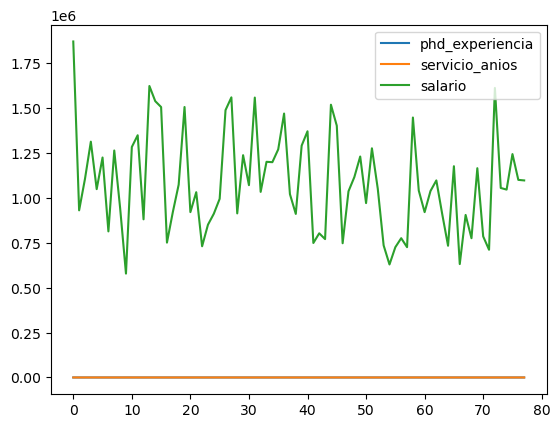

In [3]:
fig = academicos.plot()

Considerando aquellas variables con valores numéricos cercanos, la siguiente gráfica muestra una correlación entre doctorado y servicios a lo largo de los años, excepto desde los 55 hasta los 80 años, donde los servicios disminuyen, lo que significa que algunas personas dejaron el servicio a los 55 años o más.

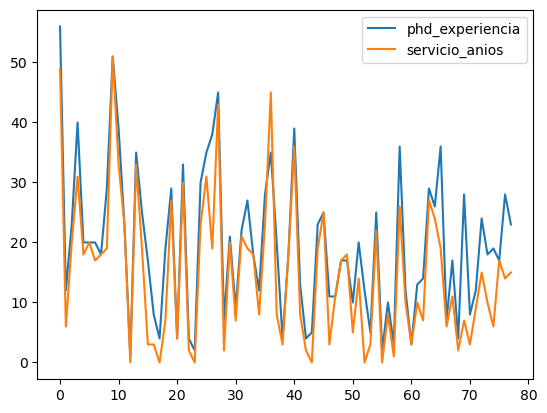

In [5]:
fig = academicos[['phd_experiencia','servicio_anios']].plot()

# Gráficos de barras

Los gráficos de barra se utilizan para comparar diferentes grupos o realizar un seguimiento de los cambios a lo largo del tiempo.

Por ejemplo, agregando los salarios por la categoría años de servicio (`servicio_anios`) y ordenando de forma descendente de acuerdo al salario,

In [8]:
por_anios_servicio = academicos.groupby(['servicio_anios']).sum()
por_anios_servicio.sort_values('salario', ascending=False, inplace=True)
por_anios_servicio.head()

,phd_experiencia,salario
servicio_anios,,
19,178,7694480
3,56,6352160
18,91,6030600
0,26,5195000
7,70,4404080


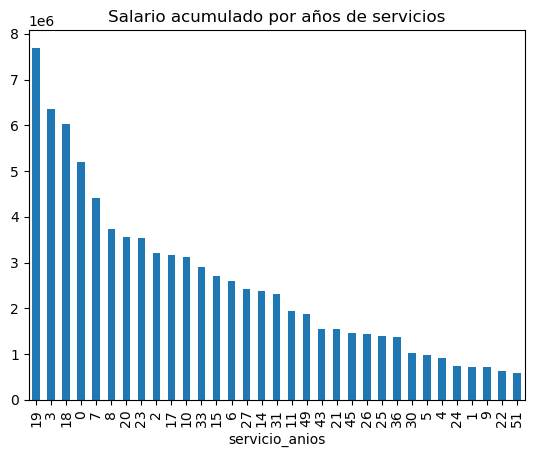

In [9]:
fig = por_anios_servicio['salario'].plot.bar(title='Salario acumulado por años de servicios')

La grafica anterior muestra que la mayoría de los académicos prestan servicios aproximadamente 19 años, por lo que el salario acumulado más alto corresponde a esta categoría.

## Gráfico circular
Un gráfico circular, 
- es útil para comparar pocas variables.
- es útil para comparar partes de un todo.
- no muestra cambios a lo largo del tiempo.

Comparando un conjunto de salarios de 5 profesionales:


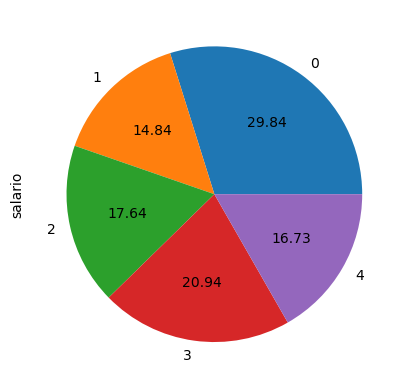

In [13]:
fig = academicos['salario'].head(5).plot.pie(autopct = '%.2f')

## Diagrama de caja (_box plot_)

Un _box plot_ representa una serie de datos numéricos a tráves de sus cuartiles. Permite visualizar en una misma grafica, el rango, los valores atípicos (_outliers_), la mediana, los cuartiles, el IQR, y los valores mínimos y máximos.

- Es usado para comparar variables usando valores estadísticos.
- Es importante tener en consideración que, las variables comparables deben tener las misma unidades.

Por ejemplo, al comparar los años de experiencia como Ph.D. y el salario, el _box plot_ produce cifras incorrectas y no proporciona información de comparación real. Esto, debido a que las unidades numéricas del salario son magnitudes mayores que las usadas en el atributo experiencia como Ph.D.

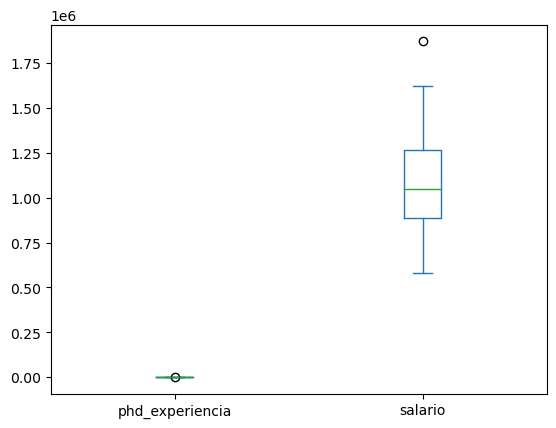

In [14]:
fig = academicos[['phd_experiencia', 'salario']].plot.box()

La siguiente gráfica muestra que la mediana y los cuartiles de Ph.D. son más altos que la mediana y los cuartiles de años de servicio. Además, el rango de Ph.D. es más amplio que el rango de años de servicio.

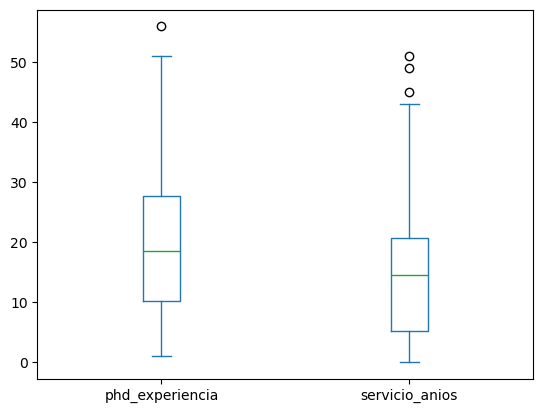

In [15]:
fig = academicos[['phd_experiencia', 'servicio_anios']].plot.box()

Utilizando la librería [`Seaborn`](https://seaborn.pydata.org), un _box plot_ para el atributo `jerarquía`, incoporando el genero de cada profesional, se muestra de la siguiente forma:

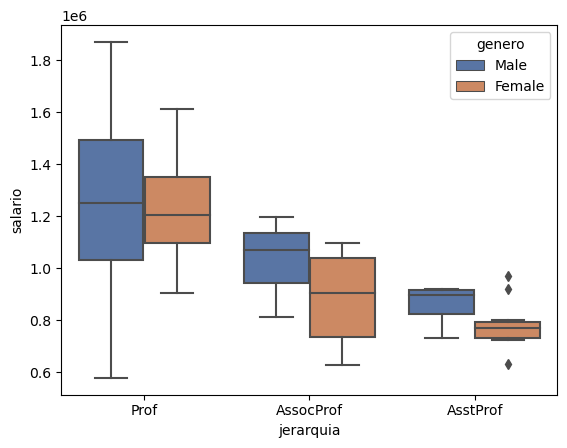

In [17]:
import seaborn as sns

fig = sns.boxplot(data=academicos,x = 'jerarquia', y = 'salario', 
    hue='genero',       # (tono) se usa para definir el atributo de la leyenda
    palette='deep'      # paleta de colores 
    )

En el [siguiente enlace](https://seaborn.pydata.org/tutorial/color_palettes.html) puede encontrar distintas paletas de colores para modificar el estilo visual de los gráficos.

## Histograma

Los histogramas se usan para representar la distribucion de una variable, esto es, que rango de valores tiene y cuales son los valores más comunes.

Los 15 primeros valores del DataFrame `academicos`, muestra que los salarios más frecuentes se encuentran en torno a 1.3 millones.

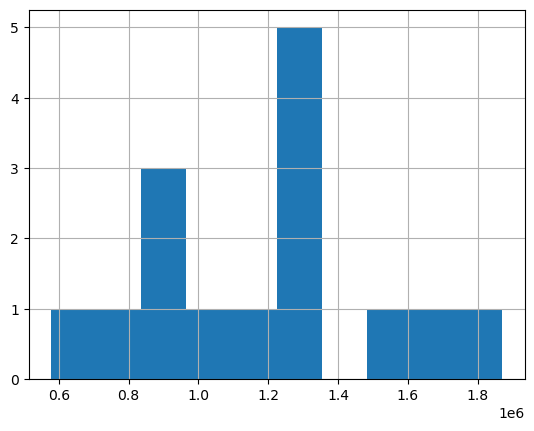

In [18]:
fig = academicos['salario'].head(15).hist()

## Diagrama de dispersión

Un diagrama de dispersión muestra la relación entre dos variables. Se utiliza una línea de tendencia para determinar correlación positiva, negativa o nula.

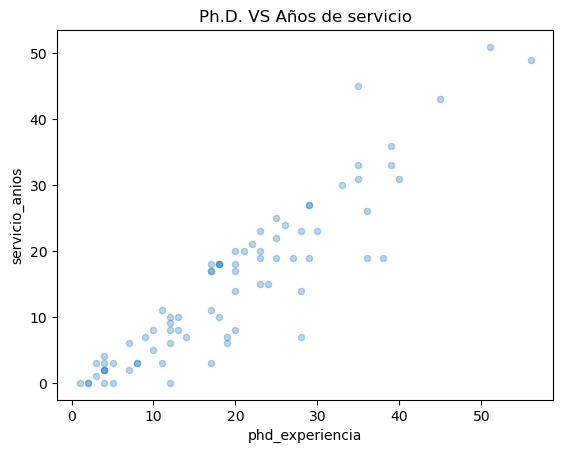

In [19]:
fig = academicos.plot.scatter(x='phd_experiencia', y='servicio_anios',
                              title = 'Ph.D. VS Años de servicio',
                              alpha = 0.3
                              )

## Strip plot

Es un diagrama de dispersión donde una de las variables es categórica.

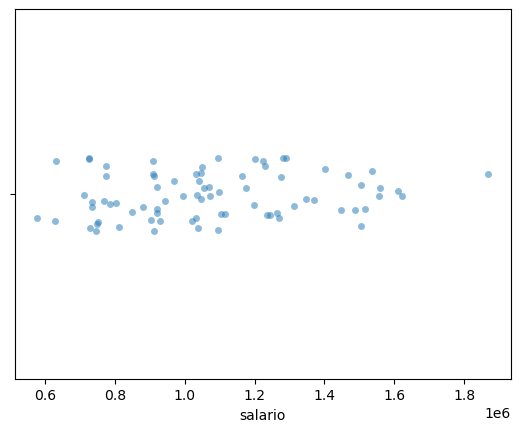

In [21]:
fig = sns.stripplot(x=academicos['salario'],
                    jitter = True, # permite controlar el ancho de las barras (separación aleatorio)
                    alpha = .5
                    )

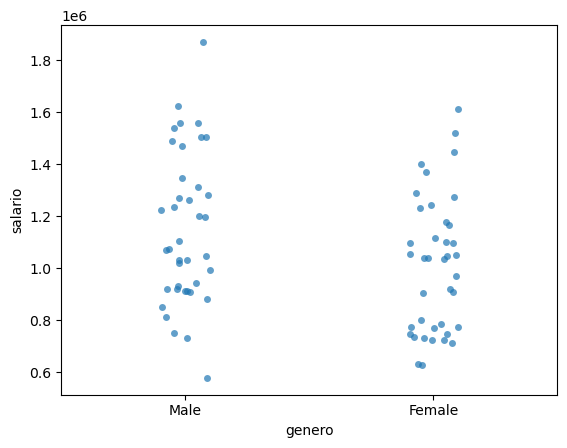

In [22]:
fig = sns.stripplot(data=academicos, x=academicos['genero'] ,y=academicos['salario'],
                    jitter = True,      # distribucion
                    alpha = .7
                    )

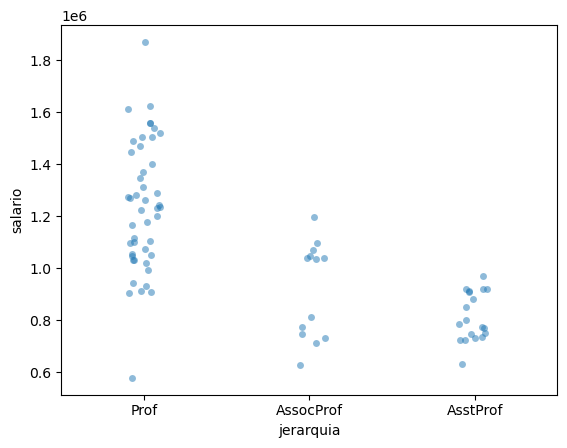

In [23]:
fig = sns.stripplot(data=academicos, x=academicos['jerarquia'], y=academicos['salario'],
                    alpha = .5      # transparencia
                    )

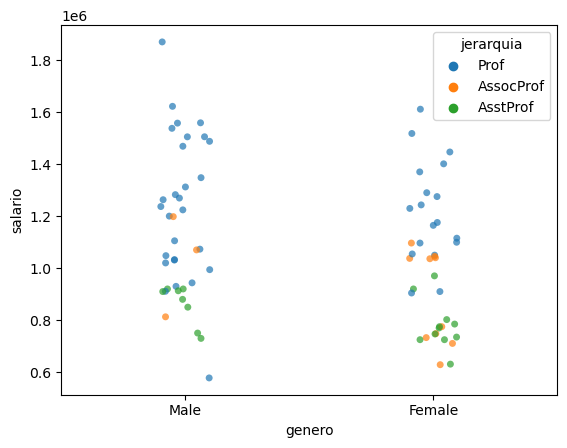

In [24]:
fig = sns.stripplot(data=academicos, x=academicos['genero'], y=academicos['salario'],
                    hue=academicos['jerarquia'],   # tinte por categoria 
                    alpha = .7
                    )

## Swarm plot

Se utiliza para visualizar diferentes categorías. Proporciona la distribución de un conjunro de variables.

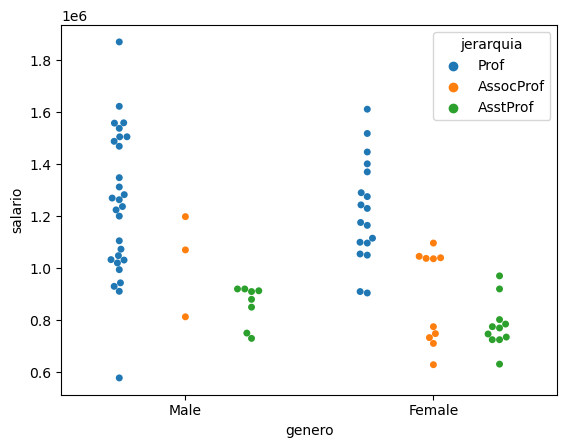

In [25]:
fig = sns.swarmplot(data=academicos, x='genero', y='salario', 
    hue='jerarquia',
    palette="tab10", 
    dodge=True    # if False permite sobreponer los valores
    )

En el gráfico anterior se puede observar que la distribución salarial por genero, refleja que,

- Los hombres tienen el rango salarial más alto.
- Las mayoría de los hombres son titulares (Prof), seguido de asistentes y luego asociados.
- La mayoria de los profesores son hombres, pero la mayoría de los profesores asociados son mujeres.

## Joint plot

Permite combinar diagramas. Es útil para visualizar patrones seleccionados.

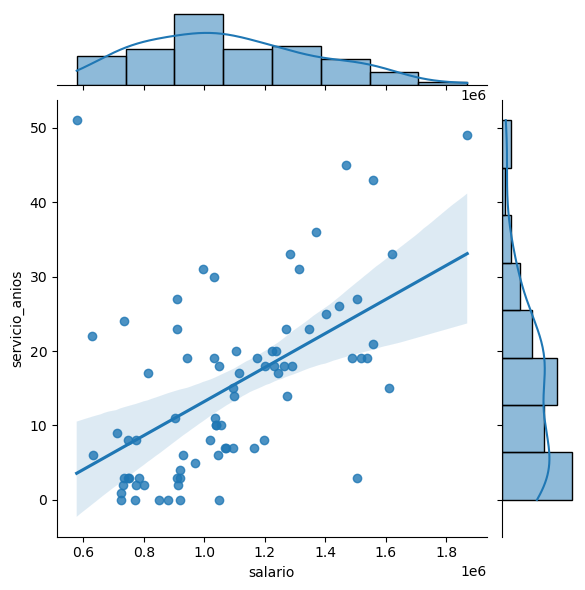

In [26]:
fig = sns.jointplot(data=academicos, x='salario', y='servicio_anios', kind='reg')